### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter


In [74]:
df = pd.read_json("data/silver/1920_2024.json")
df.Date = pd.to_datetime(df.Date)
stop_words = set(stopwords.words("english"))

In [75]:
df_1 = df.dropna(axis=0,how="any",subset=["Summary"])
df_1[:2]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line


In [76]:
df_1.shape

(4969, 17)

In [77]:
df_1["Words"] = df_1.Summary.apply(lambda x : x.split(" "))

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_40634/3916041444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Words"] = df_1.Summary.apply(lambda x : x.split(" "))


In [78]:
additional_stop_words = {"plot","crash","plane","fllight","flight","crashed" ,
                         "miles"," ", "pilot","aircraft","crew","cargo",
                         "approach","fly", "cause"}

In [79]:
stop_words = stop_words | additional_stop_words

In [80]:
stop_words = [i for i in stop_words if i not in ["off",'']]

In [81]:
lemmatizer = WordNetLemmatizer()

def add_stop_words(stop_words,x):
    [stop_words.update(i) for i in x]
    return stop_words

def to_lammetize(x):
    return [lemmatizer.lemmatize(j.lower(),  pos='v') for j in x ]

def remove_stop_word(x):
    return [i.lower() for i in x if i.lower() not in stop_words and i != ""]

In [82]:
df_1["Words"] = df_1["Words"].apply(to_lammetize)

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_40634/3868780852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Words"] = df_1["Words"].apply(to_lammetize)


In [83]:
df_1["Words"] = df_1["Words"].apply(remove_stop_word)

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_40634/1338964306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Words"] = df_1["Words"].apply(remove_stop_word)


In [84]:
df_1.Decade.max(), df_1.Decade.min()

(2020, 1900)

In [85]:
np.linspace(df_1.Decade.max(), df_1.Decade.min(),4)

array([2020., 1980., 1940., 1900.])

In [86]:
df_1

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Words
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"[light, attempt, land., error, judgement, part..."
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"[strike, tree, mountain, ridge, elevation, 1,6..."
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"[mountains, en, route., upon, enter, area, tur..."
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,None,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,None,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military,"[midair, collision, approximately, 1,500, ft.,..."
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,None,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"[10, east, cagliari, sinnai, mountains, wing, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,None,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot,"[tree, takeoff., deviation, preparation, error..."
5033,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,"{'total': 55, 'passengers': 50, 'crew': 5}","{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot,"[heavy, fog, continue, descend, decision, heig..."
5034,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,None,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,"{'total': 8, 'passengers': 3, 'crew': 5}","{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot,"[survey, deviate, pattern, mount, ostraya.]"
5035,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,"{'total': 53, 'passengers': 44, 'crew': 9}","{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir,"[industrial, area, land, attempt., lack, altit..."


In [87]:
df_1["Words"][df_1.Decade <= 1940].values

array([list(['solimoes', 'river,', 'extension', 'amazon', 'river.']),
       list(['mountain', 'low', 'overcast.']),
       list(['divert', 'washington', 'millville', 'heavy', 'traffic', 'washington', 'area.', 'near', 'fuel', 'exhaustion', 'force', 'carry', 'emergency', 'landing.', 'maneuver', 'find', 'suitable', 'location', 'heavy', 'snow,', 'strike', 'tree', 'crashed.', 'failure', 'weather', 'bureau', 'anticipate', 'minimum', 'condition', 'north', 'south', 'washington.', 'failure', 'caa', 'transmit', 'plan', 'millville', 'sufficient', 'time', 'alert', 'station', 'arrival', 'flight.']),
       ..., list(['mountain', 'en', 'route.']),
       list(['wing', 'fail', 'takeoff.']),
       list(['burn', 'attempt', 'emergency', 'landing.'])], dtype=object)

In [88]:
def plot_word_cloud(dfValues):
    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    #text = 'all your base are belong to us all of your base base base'
    wc = WordCloud().generate(" ".join([ i for j in dfValues for i in j]))
    plt.imshow(wc)
    # wordcloud = WordCloud(font_path='/Library/Fonts/Gotham-Bold.otf',width=1800,height=1400).generate(str(hr1_filter))
    # plt.imshow(wordcloud)
    plt.axis("off")
# plt.show()
def word_count(dfValues):
    return Counter([i for j in dfValues for i in j ])

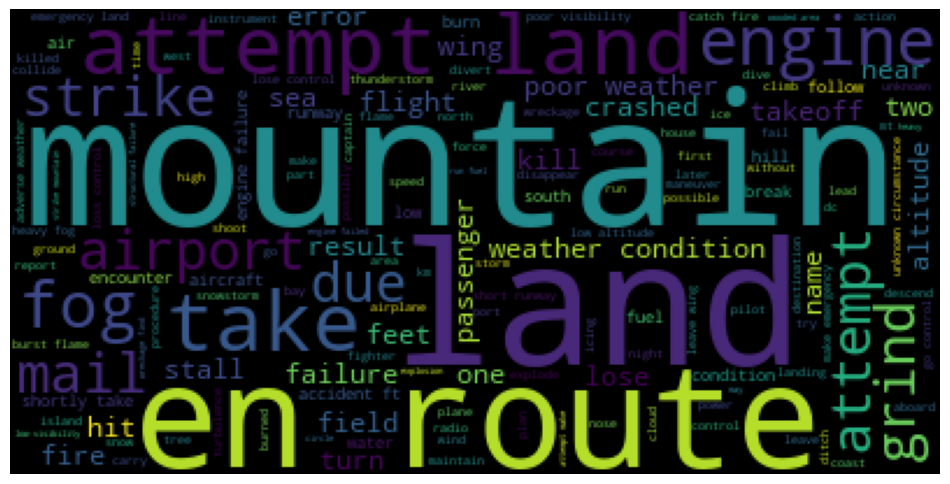

In [89]:
plot_word_cloud(df_1["Words"][df_1.Decade <= 1940].values)

In [90]:
word_count(df_1["Words"][df_1.Decade <= 1940].values)

Counter({'land': 199,
         'attempt': 180,
         'engine': 152,
         'take': 140,
         'off': 137,
         'strike': 106,
         'poor': 106,
         'weather': 101,
         'en': 101,
         'lose': 100,
         'failure': 99,
         'altitude': 96,
         'mountain': 93,
         'control': 86,
         'hit': 85,
         'low': 84,
         'grind': 83,
         'make': 80,
         'wing': 69,
         'due': 68,
         'stall': 68,
         'mail': 67,
         'crashed.': 66,
         'shortly': 65,
         'fuel': 63,
         'fire': 63,
         'condition': 55,
         'route.': 55,
         'name': 55,
         'tree': 54,
         'fog': 54,
         'one': 52,
         'leave': 50,
         'emergency': 48,
         'two': 48,
         'kill': 48,
         'route': 47,
         'near': 46,
         'feet': 46,
         'conditions.': 46,
         'shoot': 46,
         'ft.': 45,
         'off.': 44,
         'go': 44,
         'encounter': 4

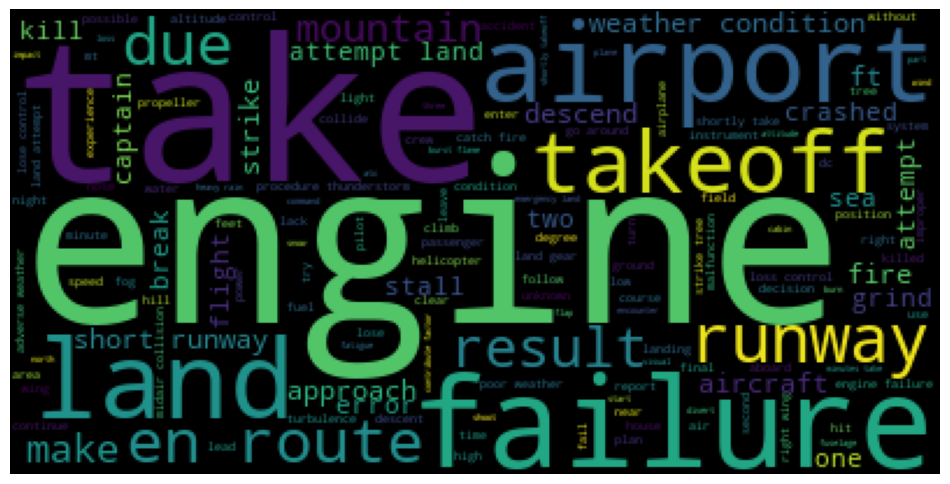

In [92]:
plot_word_cloud(df_1["Words"][(df_1.Decade > 1940) & (df_1.Decade <= 1980)].values)

In [94]:
word_count(df_1["Words"][(df_1.Decade > 1940) & (df_1.Decade <= 1980)].values)

Counter({'land': 508,
         'engine': 413,
         'take': 395,
         'off': 362,
         'failure': 345,
         'strike': 329,
         'attempt': 326,
         'runway': 320,
         'control': 312,
         'altitude': 243,
         'weather': 229,
         'lose': 228,
         'mountain': 212,
         'make': 205,
         'due': 203,
         'leave': 201,
         'loss': 187,
         'right': 185,
         'en': 182,
         'result': 178,
         'grind': 177,
         'descend': 175,
         'shortly': 175,
         'no.': 174,
         'short': 171,
         'poor': 166,
         'wing': 160,
         'takeoff': 160,
         'hit': 160,
         'fire': 160,
         'ft.': 159,
         'approach.': 147,
         'airport': 147,
         'fail': 144,
         'air': 141,
         'emergency': 138,
         'crashed.': 136,
         'fuel': 135,
         'runway.': 134,
         'conditions.': 133,
         'condition': 132,
         'one': 131,
         'tw

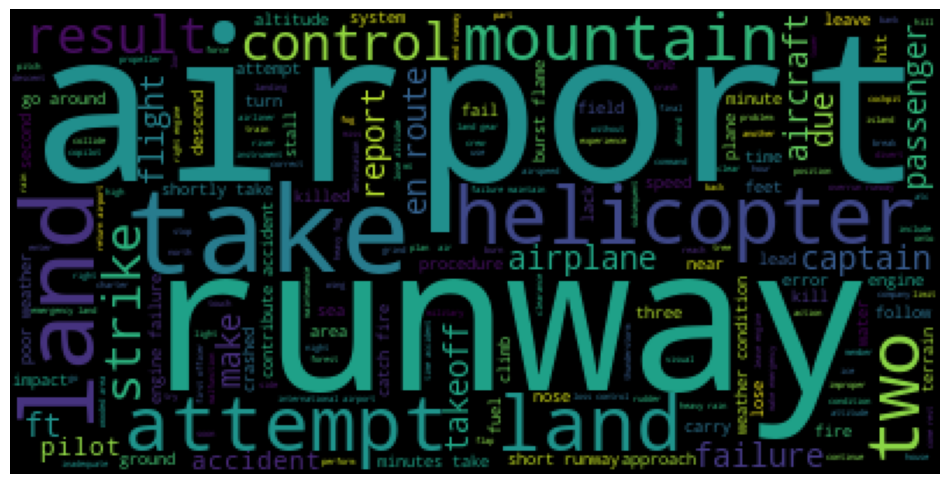

In [93]:
plot_word_cloud(df_1["Words"][(df_1.Decade > 1980)].values)

In [97]:
word_count(df_1["Words"][ (df_1.Decade > 1980)].values)

Counter({'land': 420,
         'take': 380,
         'off': 356,
         'runway': 325,
         'engine': 300,
         'failure': 293,
         'attempt': 277,
         'control': 225,
         'accident': 184,
         'lose': 180,
         'airport.': 168,
         'make': 167,
         'airport': 166,
         'altitude': 160,
         'weather': 160,
         'leave': 154,
         'result': 152,
         'strike': 151,
         'poor': 145,
         'helicopter': 143,
         'minutes': 140,
         'report': 139,
         'shortly': 138,
         'two': 135,
         'right': 123,
         'one': 121,
         'air': 116,
         'short': 115,
         'loss': 114,
         'due': 112,
         'ft.': 111,
         'fire': 109,
         'emergency': 105,
         'heavy': 105,
         'en': 104,
         'stall': 103,
         'hit': 101,
         'grind': 101,
         'fuel': 99,
         'runway.': 99,
         'fail': 97,
         'contribute': 96,
         'kill': 96,